In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
%matplotlib inline

In [2]:
datos  = pd.read_csv('/home/echeveste/mis_trabajos/correlation_f_2/funcion_correlacion/datos/dat_glx/data.dat', sep = ' ', header=None)
aleat = pd.read_csv('/home/echeveste/mis_trabajos/correlation_f_2/funcion_correlacion/datos/dat_glx/rand0.dat',sep = ' ', header=None)

In [3]:
# Pasamos los datos a un array numpy
dat = np.array(datos.T[0:3].T)
ran = np.array(aleat.T[0:3].T)

In [20]:
len(dat)

32768

In [23]:
d_max = 30
l = 250

In [24]:
data = dat

ext = []

for i in range(3):
    front = data[(data[:,i]<d_max)]
    front[:,i] += l
    ext.append(front)
    
    front = data[(data[:,i]>l-d_max)]
    front[:,i]  -= l
    ext.append(front)

for i in range(3):
    for j in range(3):
        if i<j:
            front = data[(data[:,i]<d_max)&(data[:,j]<d_max)]
            front[:,i]  += l
            front[:,j]  += l
            ext.append(front)
            
            front = data[(data[:,i]>l-d_max)&(data[:,j]>l-d_max)]
            front[:,i]  -= l
            front[:,j]  -= l
            ext.append(front)
            
            front = data[(data[:,i]<d_max)&(data[:,j]>l-d_max)]
            front[:,i]  += l
            front[:,j]  -= l
            ext.append(front)
            
            front = data[(data[:,i]>l-d_max)&(data[:,j]<d_max)]
            front[:,i]  -= l
            front[:,j]  += l
            ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]<d_max)&(data[:,2]<d_max)]
front[:,0]  += l
front[:,1]  += l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]<d_max)&(data[:,2]>l-d_max)]
front[:,0]  += l
front[:,1]  += l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]>l-d_max)&(data[:,2]<d_max)]
front[:,0]  += l
front[:,1]  -= l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]<d_max)&(data[:,2]<d_max)]
front[:,0]  -= l
front[:,1]  += l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]>l-d_max)&(data[:,2]>l-d_max)]
front[:,0]  += l
front[:,1]  -= l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]<d_max)&(data[:,2]>l-d_max)]
front[:,0]  -= l
front[:,1]  += l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]>l-d_max)&(data[:,2]<d_max)]
front[:,0]  -= l
front[:,1]  -= l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]>l-d_max)&(data[:,2]>l-d_max)]
front[:,0]  -= l
front[:,1]  -= l
front[:,2]  -= l
ext.append(front)
ext = np.concatenate(ext)
len(ext)

30406

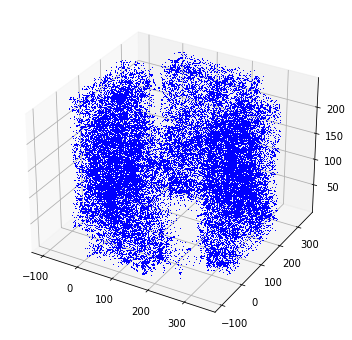

In [18]:
fig = plt.figure(figsize=(13,6))
n = 50000
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax.plot3D(dat[:,0],dat[:,1],dat[:,2],',y')
ax.plot3D(ext[:,0][:n],ext[:,1][:n],ext[:,2][:n],',b')
#ax.plot3D(dat_f[:,0],dat_f[:,1],dat_f[:,2],'.b')
#ax.view_init(270, 0)